In [13]:
# -*- coding: utf-8 -*- 
# pip install pandas numpy matplotlib seaborn scikit-learn sympy
# This code is applicable to the CICIDS2017 dataset. 
# implemented Advanced Ensemble techniques: Cat Boostiung  technique

import pandas as pd
from catboost import CatBoostClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/home/ibibers@ads.iu.edu/Intrusion_Detection_System_IDS/Advanced_Ensemble_techniques/Stacking/CICIDS2017_combined_dataset.csv')

# Drop duplicates: same observation but multiple occurences
main_df_1 = df.drop_duplicates(keep='first')

# Drop columns that have just one unique value, the model wont learn form columns like this.
one_value = main_df_1.columns[main_df_1.nunique() == 1]
main_df_2 = main_df_1.drop(columns = one_value, axis=1)

# Fill nan values
main_df_2['Flow Bytes/s'] = main_df_2['Flow Bytes/s'].fillna(main_df_2['Flow Bytes/s'].mean())

# Remove leading space character in all feature names
main_df_2.rename(columns=lambda x: x.lstrip(), inplace=True)

# Checking numbers of missing values on the df
# main_df_2.isna().sum().sum()

sample_df_1 = main_df_2.copy()

# Extract subsample of data
print (" Extract subsample of data: ")
print (sample_df_1['Label'].value_counts())

 Extract subsample of data: 
Label
BENIGN                        2096484
DoS Hulk                       172849
DDoS                           128016
PortScan                        90819
DoS GoldenEye                   10286
FTP-Patator                      5933
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
Bot                              1953
Web Attack � Brute Force         1470
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64


In [14]:
# Label encoding to convert categorical data to numerical data
le = LabelEncoder()
sample_df_1['Label'] = le.fit_transform(sample_df_1['Label'])

# Extract subsample of data
print (" Extract subsample of data: ")
print (sample_df_1['Label'].value_counts())

 Extract subsample of data: 
Label
0     2096484
4      172849
2      128016
10      90819
3       10286
7        5933
6        5385
5        5228
11       3219
1        1953
12       1470
14        652
9          36
13         21
8          11
Name: count, dtype: int64


In [15]:
# sample_df_1.shape
# sample_df_1.info()

# Take a random sample of the dataset
# sample_df_1 = sample_df_1.sample(frac=0.05, random_state=42)

print("Sampled Dataset Overview:")
# print(sample_df_2.head())
# print (sample_df_2.info())

dropped_df = ['Label', 'Flow Packets/s', 'Flow Bytes/s']
X = sample_df_1.drop( dropped_df, axis=1) 
y = sample_df_1['Label']  

Sampled Dataset Overview:


In [16]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  CatBoost Classifier 
# CatBoost is a machine learning algorithm that uses gradient boosting on decision trees.
cat = CatBoostClassifier()
cat.fit(X_train, y_train)
y_pred = cat.predict(X_test)

# categorical_features_indices = np.where(df.dtypes != np.float)[0]
# cat.fit(X_train,y_train,cat_features=([ 0,  1, 2, 3, 4, 10]),eval_set=(X_test, y_test))
# cat.score(X_test,y_test)


Learning rate set to 0.116647
0:	learn: 1.2931164	total: 2.26s	remaining: 37m 40s
1:	learn: 1.0276531	total: 4.43s	remaining: 36m 53s
2:	learn: 0.8493898	total: 6.58s	remaining: 36m 26s
3:	learn: 0.7189516	total: 8.82s	remaining: 36m 36s
4:	learn: 0.6133458	total: 11.2s	remaining: 37m 5s
5:	learn: 0.5314930	total: 13.4s	remaining: 37m
6:	learn: 0.4646538	total: 15.7s	remaining: 37m 6s
7:	learn: 0.4068475	total: 18.1s	remaining: 37m 28s
8:	learn: 0.3585235	total: 20.4s	remaining: 37m 23s
9:	learn: 0.3175550	total: 22.6s	remaining: 37m 19s
10:	learn: 0.2829833	total: 24.8s	remaining: 37m 8s
11:	learn: 0.2505928	total: 27.2s	remaining: 37m 15s
12:	learn: 0.2249045	total: 29.4s	remaining: 37m 15s
13:	learn: 0.2028629	total: 31.8s	remaining: 37m 19s
14:	learn: 0.1814328	total: 34.1s	remaining: 37m 17s
15:	learn: 0.1639959	total: 36.4s	remaining: 37m 17s
16:	learn: 0.1486079	total: 38.7s	remaining: 37m 18s
17:	learn: 0.1351219	total: 40.9s	remaining: 37m 14s
18:	learn: 0.1226413	total: 43.4s

In [17]:
# Evaluate the performance of the stacking model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Stacking Model:", accuracy)


Accuracy of Stacking Model: 0.9988760548136372


In [20]:
# Convert the encoded labels to the original labels by using inverse_transform 
y_pred = le.inverse_transform(y_pred)
y_test_labels = le.inverse_transform(y_test)

# Create a mapping between numerical labels and their corresponding real labels
label_mapping = {label: le.inverse_transform([label])[0] for label in set(y_test)}
print (label_mapping)

{0: 'BENIGN', 1: 'Bot', 2: 'DDoS', 3: 'DoS GoldenEye', 4: 'DoS Hulk', 5: 'DoS Slowhttptest', 6: 'DoS slowloris', 7: 'FTP-Patator', 8: 'Heartbleed', 9: 'Infiltration', 10: 'PortScan', 11: 'SSH-Patator', 12: 'Web Attack � Brute Force', 13: 'Web Attack � Sql Injection', 14: 'Web Attack � XSS'}


/home/ibibers@ads.iu.edu/micromamba/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred))


Classification Report:


/home/ibibers@ads.iu.edu/micromamba/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ibibers@ads.iu.edu/micromamba/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                            precision    recall  f1-score   support

                    BENIGN       1.00      1.00      1.00    419148
                       Bot       0.92      0.78      0.84       403
                      DDoS       1.00      1.00      1.00     25498
             DoS GoldenEye       1.00      1.00      1.00      2032
                  DoS Hulk       1.00      1.00      1.00     34853
          DoS Slowhttptest       0.99      0.99      0.99      1038
             DoS slowloris       1.00      0.99      0.99      1085
               FTP-Patator       1.00      1.00      1.00      1160
                Heartbleed       1.00      0.50      0.67         2
              Infiltration       1.00      0.75      0.86         4
                  PortScan       0.99      1.00      0.99     18187
               SSH-Patator       1.00      1.00      1.00       633
  Web Attack � Brute Force       0.69      0.95      0.80       294
Web Attack � Sql Injection       0.00      0.00

/home/ibibers@ads.iu.edu/micromamba/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


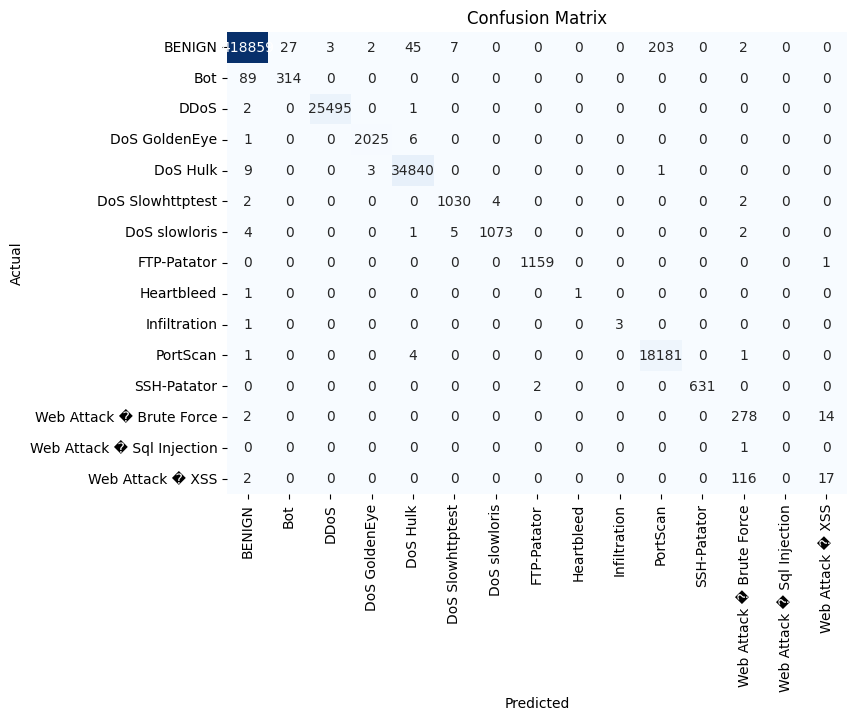

In [23]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test_labels, y_pred , labels = le.classes_)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", cbar=False,  xticklabels=le.classes_.tolist(), yticklabels=le.classes_.tolist()) 
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

/tmp/ipykernel_192922/301744246.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(sorted_importance.values()), y=list(sorted_importance.keys()), palette='cubehelix')


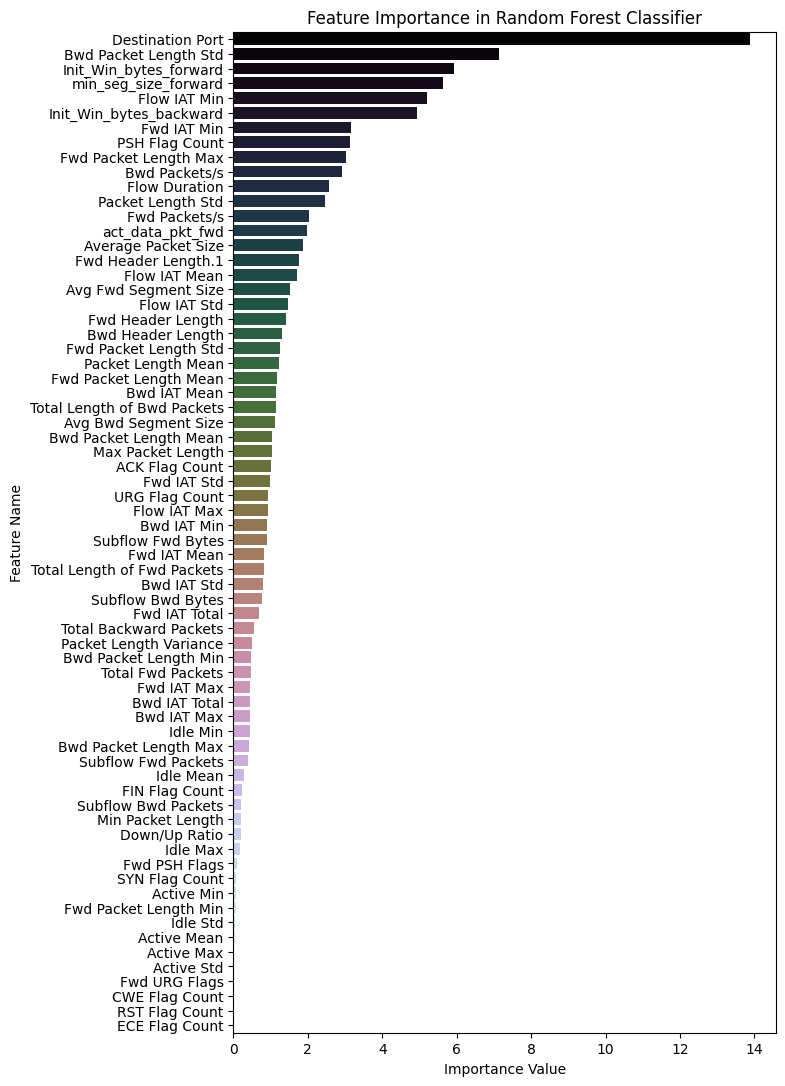

In [24]:
# importances of features in the decision tree model 
importance = cat.feature_importances_
importance_dict = dict(zip(X.columns.values, importance))
sorted_importance = dict(sorted(importance_dict.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(7, 13))
sns.barplot(x=list(sorted_importance.values()), y=list(sorted_importance.keys()), palette='cubehelix')
plt.xlabel('Importance Value')
plt.ylabel('Feature Name')
plt.title('Feature Importance in Random Forest Classifier')
plt.show()